In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\pooja\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\pooja\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\pooja\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
progress0 = pd.read_csv('progress.csv')

In [3]:
progress0.head()

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_faulty_episodes,num_healthy_workers,num_in_flight_async_reqs,num_remote_worker_restarts,num_agent_steps_sampled,...,info/learner/player_0/learner_stats/mean_q,info/learner/player_0/learner_stats/min_q,info/learner/player_0/learner_stats/max_q,info/learner/player_0/learner_stats/cur_lr,info/learner/player_1/learner_stats/allreduce_latency,info/learner/player_1/learner_stats/grad_gnorm,info/learner/player_1/learner_stats/mean_q,info/learner/player_1/learner_stats/min_q,info/learner/player_1/learner_stats/max_q,info/learner/player_1/learner_stats/cur_lr
0,0.0,-1.0,-0.326923,1.959615,520,0,0,0,0,1019,...,0.003822,0.001477,0.005224,0.0005,0.0,2.257485,0.004716,0.000541,0.007473,0.0005
1,1.0,-1.0,-0.074074,5.280423,189,0,0,0,0,2039,...,-0.003676,-1.538949,0.497060,0.0005,0.0,0.105793,-0.559100,-2.428858,-0.106296,0.0005
2,2.0,-1.0,0.092199,7.390071,141,0,0,0,0,3059,...,-0.109252,-3.177185,0.283227,0.0005,0.0,0.141001,-0.507839,-2.985178,0.207592,0.0005
3,8.0,-1.0,0.160494,6.302469,162,0,0,0,0,4080,...,-0.050330,-2.253499,0.709832,0.0005,0.0,0.070468,-0.356962,-2.459321,0.849841,0.0005
4,6.0,-1.0,0.520000,12.510000,81,0,0,0,0,5099,...,0.084872,-1.444783,0.800248,0.0005,0.0,0.081955,-0.464590,-4.162220,1.055153,0.0005


In [4]:
progress0.shape

(785, 118)

In [5]:
progress1 = pd.read_csv('progress2.csv')

In [6]:
progress1.shape

(674, 118)

In [7]:
progress2 = pd.read_csv('progress3.csv')

In [8]:
progress2.shape

(997, 118)

In [9]:
progress3 = pd.read_csv('progress4.csv')

In [10]:
progress3.shape

(952, 118)

In [11]:
progress4 = pd.read_csv('progress5.csv')
progress4.shape

(718, 118)

In [12]:
progress_combined = pd.concat([progress0, progress1, progress2, progress3, progress4], axis = 0)

In [13]:
progress_combined.shape

(4126, 118)

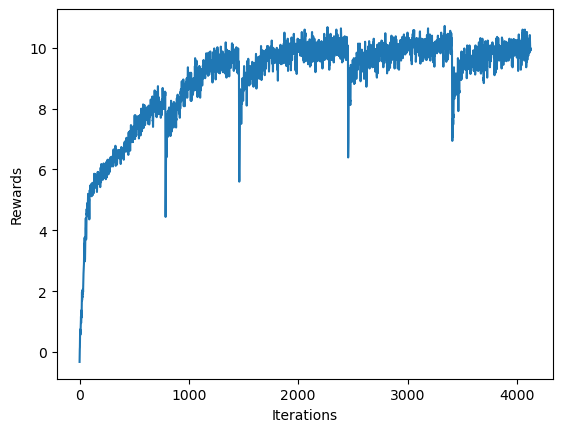

In [55]:
plt.plot([i for i in range(progress_combined.shape[0])], progress_combined['episode_reward_mean'])
# plt.title('Episode Reward Mean Across Episodes')
plt.ylabel('Rewards')
plt.xlabel('Iterations')
plt.savefig('episode_reward_mean_dqn')
plt.show()

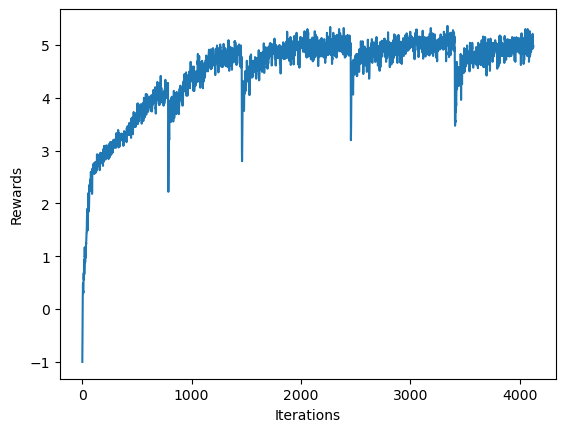

In [58]:
plt.plot([i for i in range(progress_combined.shape[0])], progress_combined['sampler_results/policy_reward_mean/player_1'])
# plt.title('Episode Reward Mean Across Episodes For Player 1')
plt.ylabel('Rewards')
plt.xlabel('Iterations')
plt.savefig('episode_reward_mean_dqn_player_1')
plt.show()

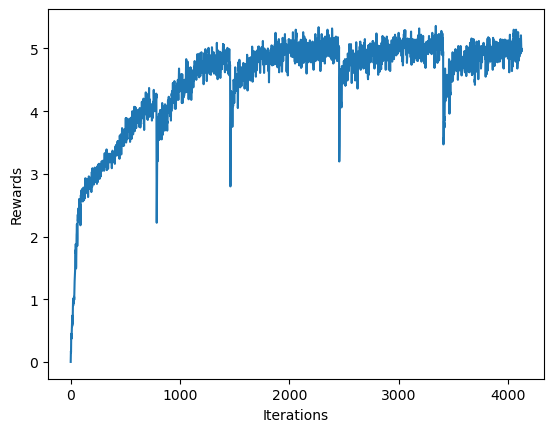

In [59]:
plt.plot([i for i in range(progress_combined.shape[0])], progress_combined['sampler_results/policy_reward_mean/player_0'])
# plt.title('Episode Reward Mean Across Episodes For Player 0')
plt.ylabel('Rewards')
plt.xlabel('Iterations')
plt.savefig('episode_reward_mean_dqn_player_0')
plt.show()

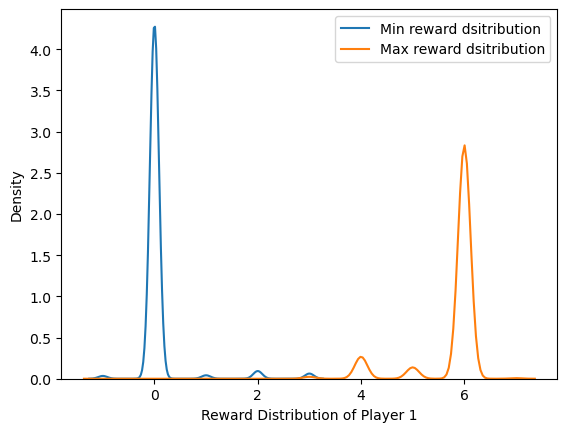

In [53]:
import seaborn as sns

sns.kdeplot(progress_combined['policy_reward_min/player_1'], label = 'Min reward dsitribution')
sns.kdeplot(progress_combined['policy_reward_max/player_1'], label = 'Max reward dsitribution')
plt.xlabel('Reward Distribution of Player 1')
plt.legend()
plt.savefig('episode_reward_dist_dqn_player_1')
plt.show()

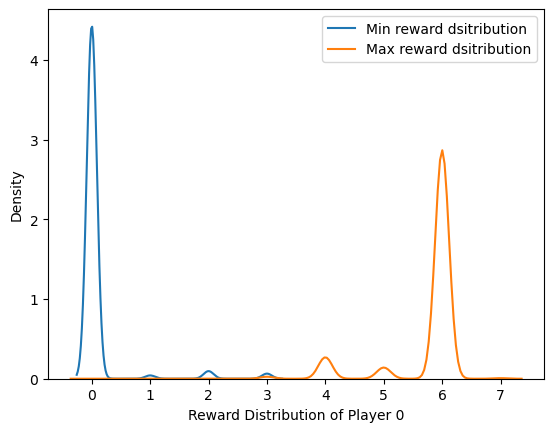

In [54]:
sns.kdeplot(progress_combined['policy_reward_min/player_0'], label = 'Min reward dsitribution')
sns.kdeplot(progress_combined['policy_reward_max/player_0'], label = 'Max reward dsitribution')
plt.xlabel('Reward Distribution of Player 0')
plt.legend()
plt.savefig('episode_reward_dist_dqn_player_0')
plt.show()

<Axes: xlabel='episode_reward_max', ylabel='Density'>

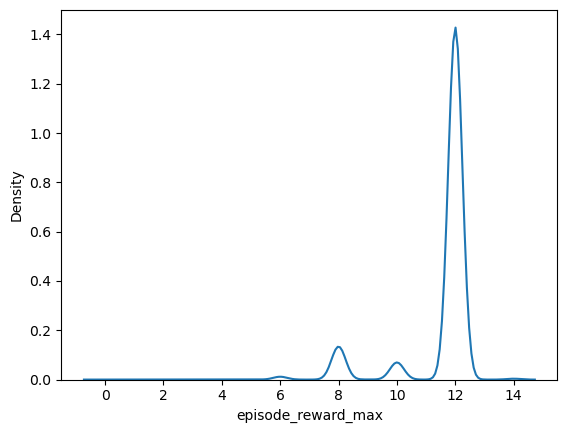

In [37]:
sns.kdeplot(progress_combined['episode_reward_max'])

In [17]:
progress_no_sharing = pd.read_csv('progress_no_param_training.csv')

In [18]:
progress_sharing = pd.read_csv('progress_param_sharing.csv')

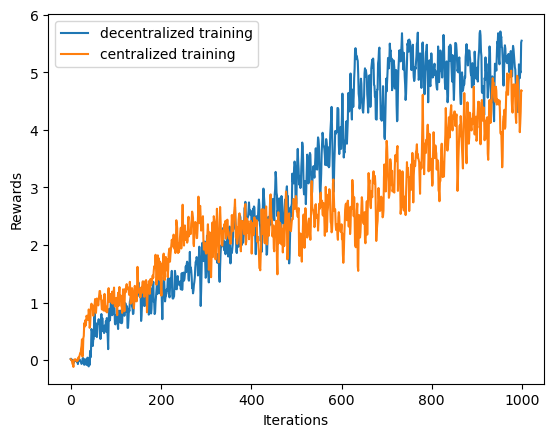

In [56]:
plt.plot([i for i in range(progress_no_sharing.shape[0])], progress_no_sharing['episode_reward_mean'], label = "decentralized training")
plt.plot([i for i in range(progress_no_sharing.shape[0])], progress_sharing['episode_reward_mean'], label = "centralized training")
plt.legend()
# plt.title('Episode Reward Mean Across Episodes')
plt.ylabel('Rewards')
plt.xlabel('Iterations')
plt.savefig('ct_dt')
plt.show()